In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [45]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2251,1399-UBQIU,Male,0,No,No,11,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25,No
6468,2599-CZABP,Male,0,Yes,No,14,Yes,No,DSL,No,...,No,No,No,No,One year,No,Electronic check,44.60,641.25,No
6039,5649-TJHOV,Male,1,Yes,No,27,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),36.50,1032,Yes
2451,3325-FUYCG,Male,0,Yes,Yes,28,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Electronic check,106.10,2847.4,Yes
1734,7511-YMXVQ,Male,0,No,No,9,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.40,418.8,Yes


In [46]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [47]:
df.shape

(7043, 21)

In [48]:
5174*100/df.shape[0]

73.46301292063042

In [49]:
df.drop('customerID', axis=1, inplace=True)

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [52]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [53]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [54]:
df.iloc[488].TotalCharges

' '

In [55]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [56]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [57]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_10720\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


Visualisation

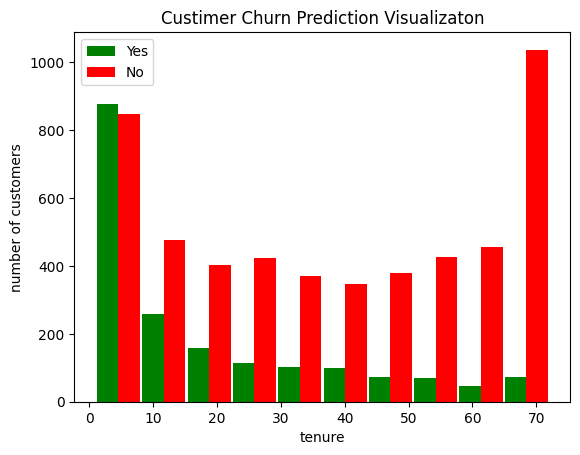

In [58]:
no = df1[df1.Churn == 'No'].tenure
yes = df1[df1.Churn == 'Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("Custimer Churn Prediction Visualizaton")
plt.hist([yes, no], rwidth=0.95, color=['green', 'red'], label=['Yes', 'No']);
plt.legend()

khách rời đi thường là khách hàng cũ

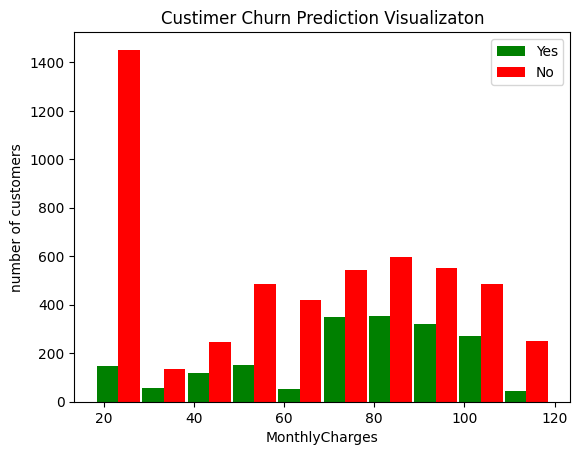

In [59]:
no = df1[df1.Churn == 'No'].MonthlyCharges
yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("number of customers")
plt.title("Custimer Churn Prediction Visualizaton")
plt.hist([yes, no], rwidth=0.95, color=['green', 'red'], label=['Yes', 'No']);
plt.legend()

In [60]:
def unique(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}:{df[col].unique()}')

In [61]:
print(unique(df1))


gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']
None


Replace

In [62]:
df1.replace('No internet service','No', inplace=True )
df1.replace('No phone service','No', inplace=True )

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_10720\1647535821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True )
C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_10720\1647535821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True )


In [63]:
for col in df1:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_10720\1102442918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [64]:
df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)
df1.gender.unique()

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_10720\1445479242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)


array([1, 0], dtype=int64)

In [65]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract', 'PaymentMethod'])

In [74]:
col2scale = ['tenure', 'MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()



In [75]:
df2[col2scale] = scaler.fit_transform(df2[col2scale])


In [76]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [77]:
x = df2.drop('Churn', axis=1)
y = df2.Churn.astype(np.float32)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)

In [80]:
y_train.value_counts()

0.0    4123
1.0    1502
Name: Churn, dtype: int64

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
def log_reg(X_train, y_train, X_test, y_test, weights): 
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights [1]})
    model.fit(X_train, y_train)
    print("Accuracy", model.score (X_test, y_test), "\n")

    y_pred = model.predict(X_test)
    print("preds", y_pred[:5], "\n")

    cl_rep = classification_report (y_test,y_pred)
    print(cl_rep)    

In [83]:
weights = -1
log_reg(x_train, y_train, x_test, y_test, weights)

Accuracy 0.814498933901919 

preds [0. 0. 0. 0. 0.] 

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1040
         1.0       0.68      0.54      0.60       367

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.81      0.81      1407

